In [1]:
import numpy as np
import pandas as pd

In [66]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [48]:
def perf_measure(y_actual, y_hat):
    y_actual = y_actual.to_list()
    y_hat = y_hat.to_list()
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
               TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
               FP += 1
        if y_actual[i]==y_hat[i]==0:
               TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
               FN += 1

    return(TP, FP, TN, FN)

In [82]:
# load
result = pd.read_csv('result_lstm_batch512_epoch20es_undersam.csv')
original_train = pd.read_csv('train.csv')

result = result.set_index('id').copy()
original_train = original_train.set_index('id').copy()

# get meta data for testing instances
test_meta = original_train.loc[result.index]

In [109]:
result.head()

,lstm_predict,target
id,,
5882864,0,0
5882865,0,0
5882866,0,0
5882867,0,0
5882868,0,0


In [111]:
test_meta.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
5882864,0.0,My son was molested by his father...a first-ti...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,373123,approved,0,0,0,6,0,0.0,0,4
5882865,0.0,I sincerely doubt you were as upset at the vit...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,373197,approved,1,0,0,0,0,0.0,0,4
5882866,0.0,Some governors are complaining about losing​ l...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,373302,approved,1,0,0,0,0,0.0,0,4
5882867,0.0,Because of another Constitutional issue; the ...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,373251,approved,0,0,0,3,3,0.0,0,4
5882868,0.0,"And again we come back to an obvious truth, i....",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,373233,approved,0,0,0,10,0,0.0,0,4


In [61]:
test_meta.columns

Index(['target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [92]:
print('IDENTITY = female')
result_female = result[test_meta.female.apply(lambda x:x>=0.5)] # female related comment target
(TP, FP, TN, FN) = perf_measure(result_female.lstm_predict, result_female.target)
print('number of TP:', TP)
print('number of FP:', FP)
print('number of TN:', TN)
print('number of FN:', FN)
print('accuracy:', round(accuracy_score(result_female.lstm_predict, result_female.target), 4))
print('precision:',round(precision_score(result_female.lstm_predict, result_female.target), 4))
print('recall:', round(recall_score(result_female.lstm_predict, result_female.target), 4))
print('f1:', round(f1_score(result_female.lstm_predict, result_female.target), 4))
print('false alarm rate = ', round(FP/(FP+TN), 4))

IDENTITY = female
number of TP: 1490
number of FP: 189
number of TN: 7897
number of FN: 2468
accuracy: 0.7794
precision: 0.8874
recall: 0.3765
f1: 0.5286
false alarm rate =  0.0234


In [90]:
print('IDENTITY = male')
result_male = result[test_meta.male.apply(lambda x:x>=0.5)] # female related comment target
(TP, FP, TN, FN) = perf_measure(result_male.lstm_predict, result_male.target)
print('number of TP:', TP)
print('number of FP:', FP)
print('number of TN:', TN)
print('number of FN:', FN)
print('accuracy:', round(accuracy_score(result_male.lstm_predict, result_male.target), 4))
print('precision:',round(precision_score(result_male.lstm_predict, result_male.target), 4))
print('recall:', round(recall_score(result_male.lstm_predict, result_male.target), 4))
print('f1:', round(f1_score(result_male.lstm_predict, result_male.target), 4))
print('false alarm rate = ', round(FP/(FP+TN), 4))

IDENTITY = male
number of TP: 1395
number of FP: 172
number of TN: 6265
number of FN: 2092
accuracy: 0.7719
precision: 0.8902
recall: 0.4001
f1: 0.552
false alarm rate =  0.0267


In [85]:
print('IDENTITY = asian')
result_asian = result[test_meta.asian.apply(lambda x:x>=0.5)] # female related comment target
(TP, FP, TN, FN) = perf_measure(result_asian.lstm_predict, result_asian.target)
print('number of TP:', TP)
print('number of FP:', FP)
print('number of TN:', TN)
print('number of FN:', FN)
print('accuracy:', round(accuracy_score(result_asian.lstm_predict, result_asian.target), 4))
print('precision:',round(precision_score(result_asian.lstm_predict, result_asian.target), 4))
print('recall:', round(recall_score(result_asian.lstm_predict, result_asian.target), 4))
print('f1:', round(f1_score(result_asian.lstm_predict, result_asian.target), 4))
print('false alarm rate = ', round(FP/(FP+TN), 4))

IDENTITY = asian
number of TP: 95
number of FP: 14
number of TN: 586
number of FN: 146
accuracy: 0.8098
precision: 0.8716
recall: 0.3942
f1: 0.5429
false alarm rate =  0.0233


In [91]:
print('IDENTITY = psychiatric_or_mental_illness')
result_identity = result[test_meta.psychiatric_or_mental_illness.apply(lambda x:x>=0.5)] # female related comment target
(TP, FP, TN, FN) = perf_measure(result_female.lstm_predict, result_female.target)
print('number of TP:', TP)
print('number of FP:', FP)
print('number of TN:', TN)
print('number of FN:', FN)
print('accuracy:', round(accuracy_score(result_identity.lstm_predict, result_identity.target), 4))
print('precision:',round(precision_score(result_identity.lstm_predict, result_identity.target), 4))
print('recall:', round(recall_score(result_identity.lstm_predict, result_identity.target), 4))
print('f1:', round(f1_score(result_identity.lstm_predict, result_identity.target), 4))
print('false alarm rate = ', round(FP/(FP+TN), 4))

IDENTITY = psychiatric_or_mental_illness
number of TP: 204
number of FP: 19
number of TN: 546
number of FN: 254
accuracy: 0.7331
precision: 0.9148
recall: 0.4454
f1: 0.5991
false alarm rate =  0.0336


In [93]:
print('IDENTITY = homosexual_gay_or_lesbian')
result_identity = result[test_meta.homosexual_gay_or_lesbian.apply(lambda x:x>=0.5)] # female related comment target
(TP, FP, TN, FN) = perf_measure(result_female.lstm_predict, result_female.target)
print('number of TP:', TP)
print('number of FP:', FP)
print('number of TN:', TN)
print('number of FN:', FN)
print('accuracy:', round(accuracy_score(result_identity.lstm_predict, result_identity.target), 4))
print('precision:',round(precision_score(result_identity.lstm_predict, result_identity.target), 4))
print('recall:', round(recall_score(result_identity.lstm_predict, result_identity.target), 4))
print('f1:', round(f1_score(result_identity.lstm_predict, result_identity.target), 4))
print('false alarm rate = ', round(FP/(FP+TN), 4))

IDENTITY = homosexual_gay_or_lesbian
number of TP: 708
number of FP: 40
number of TN: 764
number of FN: 1063
accuracy: 0.5717
precision: 0.9465
recall: 0.3998
f1: 0.5621
false alarm rate =  0.0498


In [112]:
print('IDENTITY = black')
result_identity = result[test_meta.black.apply(lambda x:x>=0.5)] # female related comment target
(TP, FP, TN, FN) = perf_measure(result_female.lstm_predict, result_female.target)
print('number of TP:', TP)
print('number of FP:', FP)
print('number of TN:', TN)
print('number of FN:', FN)
print('accuracy:', round(accuracy_score(result_identity.lstm_predict, result_identity.target), 4))
print('precision:',round(precision_score(result_identity.lstm_predict, result_identity.target), 4))
print('recall:', round(recall_score(result_identity.lstm_predict, result_identity.target), 4))
print('f1:', round(f1_score(result_identity.lstm_predict, result_identity.target), 4))
print('false alarm rate = ', round(FP/(FP+TN), 4))

IDENTITY = black
number of TP: 1347
number of FP: 84
number of TN: 1019
number of FN: 1676
accuracy: 0.5734
precision: 0.9413
recall: 0.4456
f1: 0.6048
false alarm rate =  0.0762


In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [5]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [9]:
#!pip3 install wordcloud

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Error initializing plugin EntryPoint(name='Windows (alt)', value='keyrings.alt.Windows', group='keyring.backends').
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/keyring/backend.py", line 203, in _load_plugins
    init_func = ep.load()
  File "/home/student.unimelb.edu.au/xiaoyuel4/.local/lib/python3.6/site-packages/importlib_metadata/__init__.py", line 105, in load
    module = import_module(match.group('module'))
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "

In [22]:
toxic_set = original_train[original_train.target.apply(lambda x: x==1)]

In [30]:
STOPWORDS.add('will')
STOPWORDS.add('people')
STOPWORDS.add('us')

In [98]:
mask = np.array(Image.open('Mad_Devil.png'))

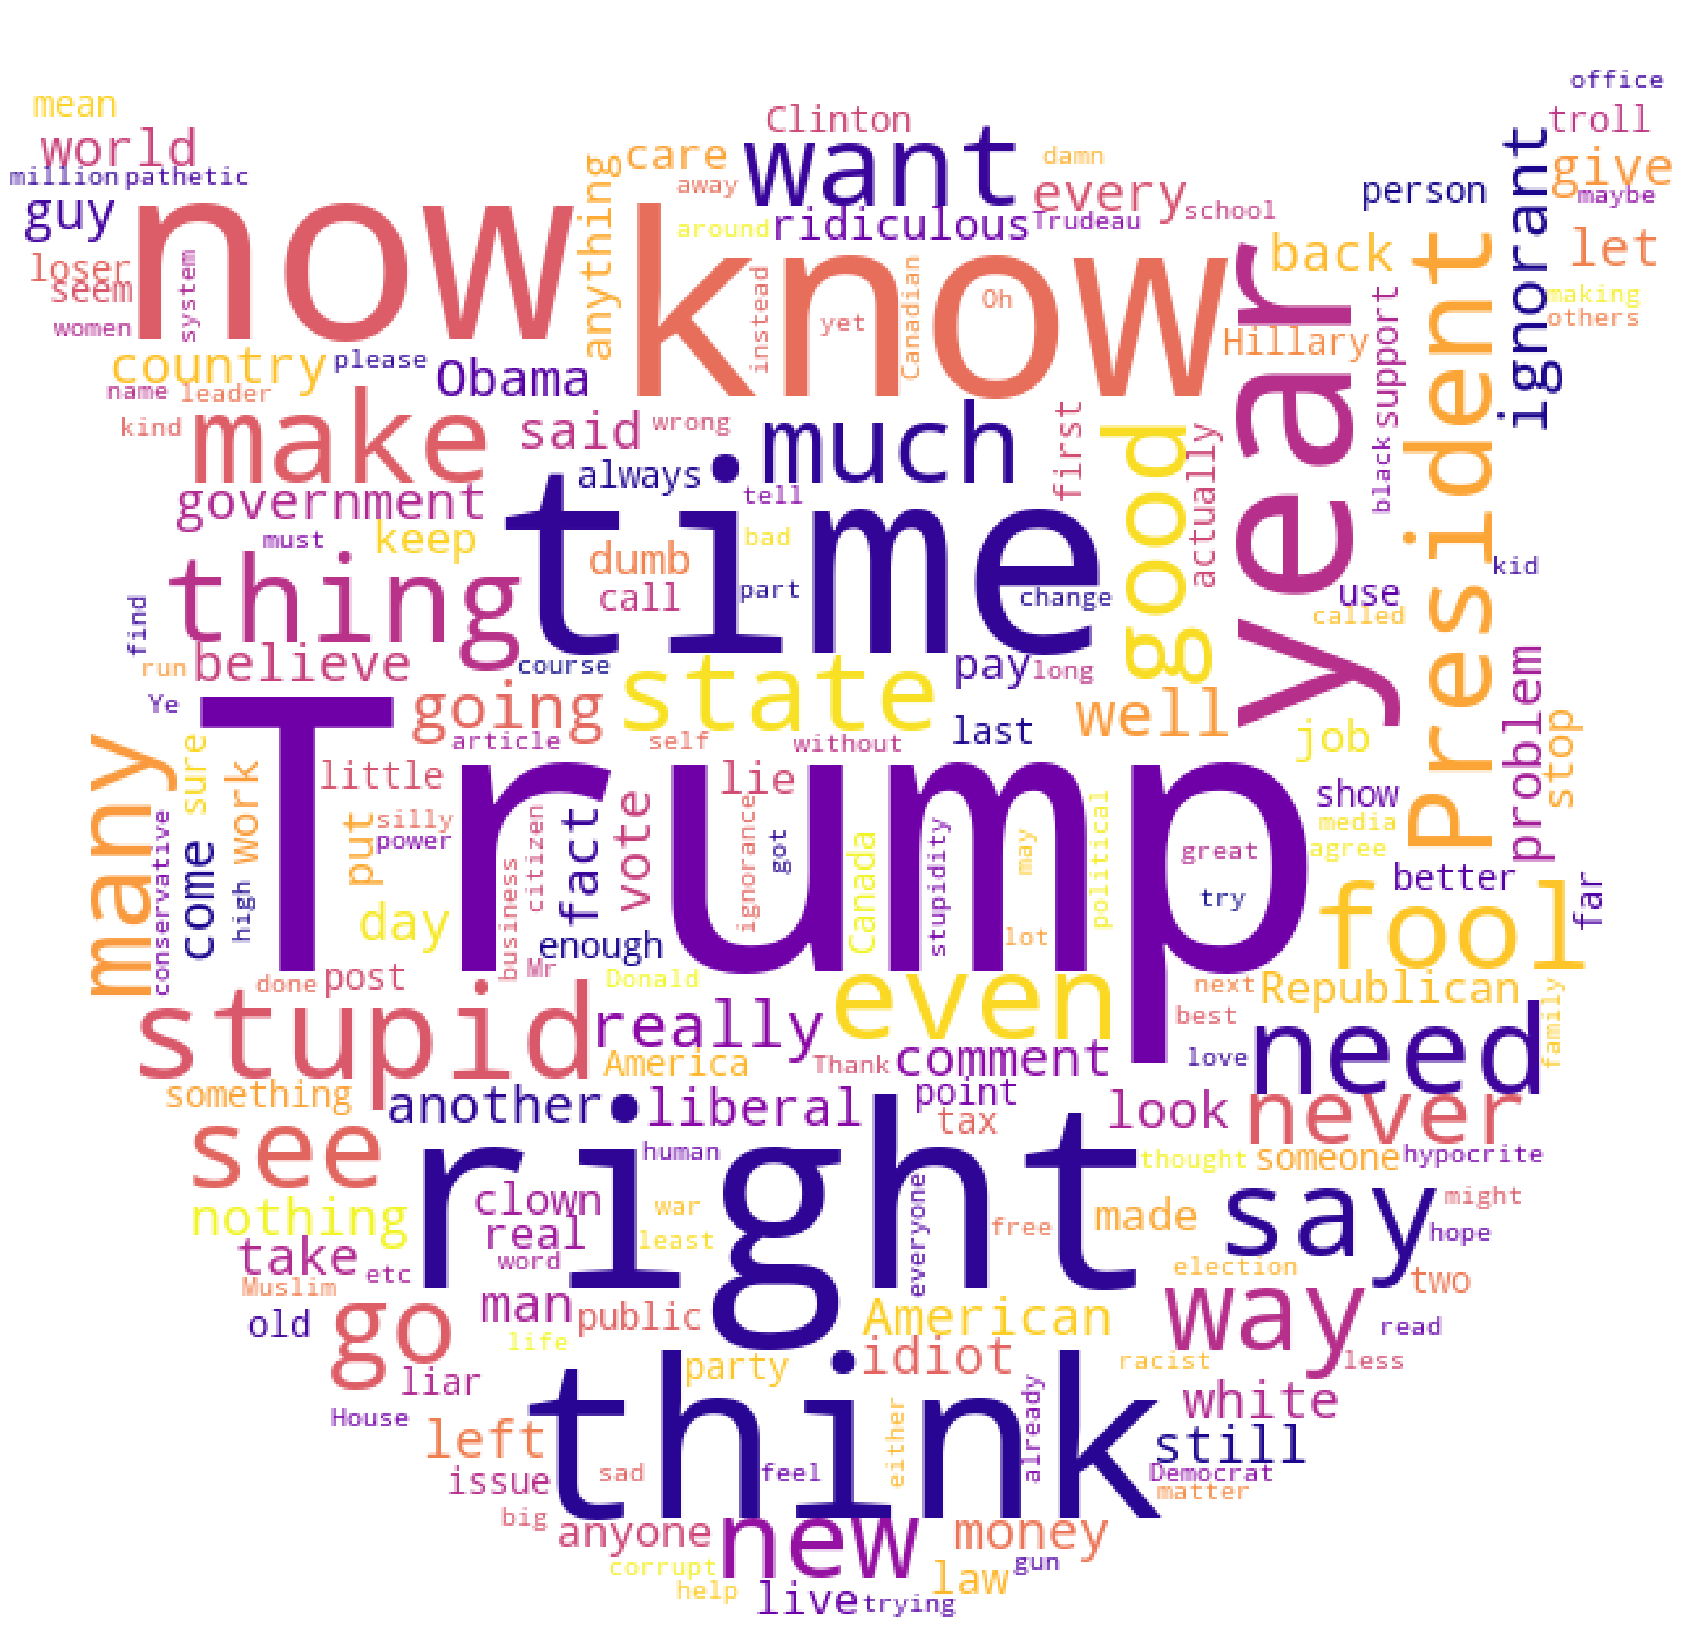

In [108]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=7, background_color='white', 
                      colormap='plasma', collocations=False, stopwords = STOPWORDS, mask=mask)

# Plot
plot_cloud(wordcloud.generate(''.join([txt for txt in toxic_set.comment_text])))